In [ ]:
# hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# default_exp feature_eng

# Feature engineering

In [ ]:
#hide
import matplotlib.pyplot as plt
from nbdev.showdoc import *

In [ ]:
#export
import time
import pandas as pd
import numpy as np
import random

from fastcore.test import *
from time_series_segmentation import *

In [ ]:
df_train, df_test, df_sample = get_liverpool_ion_data()

data folder already exists


In [ ]:
df_train

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0
...,...,...,...
4999995,499.9996,2.9194,7
4999996,499.9997,2.6980,7
4999997,499.9998,4.5164,8
4999998,499.9999,5.6397,9


In [ ]:
# export
def add_seq_indicator(data_index, seq_len=20):
    '''
    function to be used with apply in df.
    Assings sequence labels to sections of the data which allows us to randomly train/val/test splitt the subsequences.
    the acctual splitt

    Parameters:

    Output:

    '''
    return np.int(np.ceil((data_index.name+1)/seq_len))

In [ ]:
# export
def dataframe_split(data, fraction = 0.1, random_state = 42, sep_col='seq_idx'):
    '''
    Creates a random split by the desired column
    '''
    if sep_col not in data.columns:
        data[sep_col] = data.apply(add_seq_indicator,seq_len=1000, axis=1)

    random.seed(random_state)
    sequence_numbers = data[sep_col].unique().tolist()
    k = int(np.ceil(data[sep_col].nunique()*fraction))
    split_list = random.sample(sequence_numbers, k=k)
    test = data.loc[data[sep_col].isin(split_list), :]
    train = data.drop(test.index)
    return train, test

In [ ]:
train_train, train_val = dataframe_split(df_train, fraction = 0.1, random_state = 42, sep_col='seq_idx')

(<matplotlib.axes._subplots.AxesSubplot at 0x2107b23cf48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2107b23cf48>)

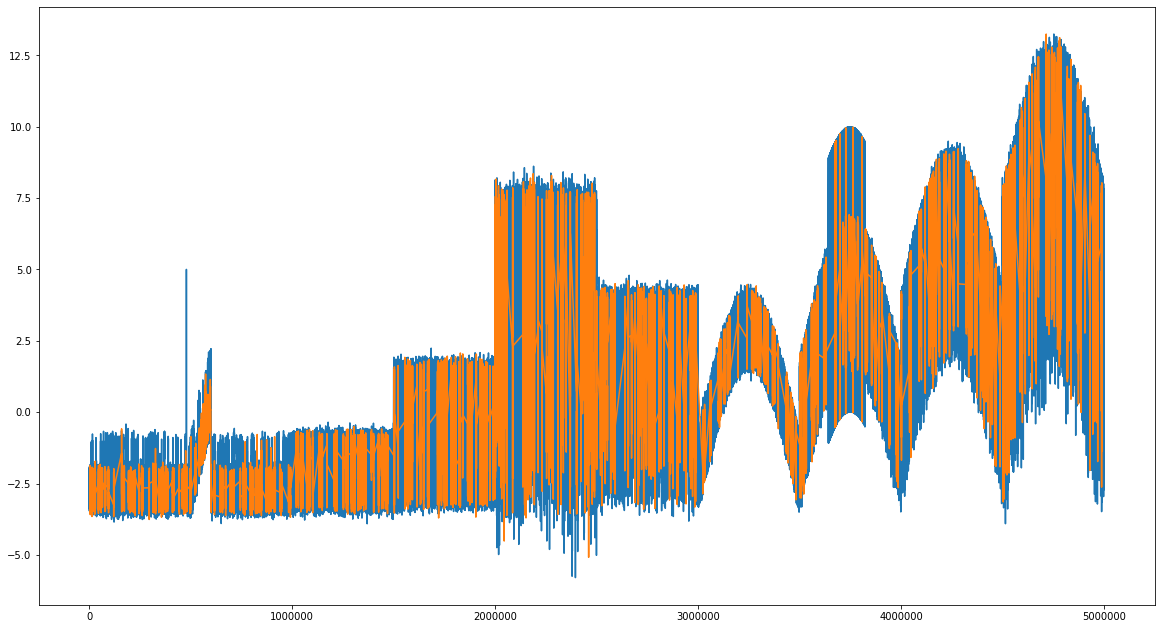

In [ ]:
train_train.loc[:,'signal'].plot(figsize=(20,11)), train_val.loc[:,'signal'].plot(figsize=(20,11))

In [ ]:
train_train.shape, train_val.shape

((4500000, 4), (500000, 4))

In [ ]:
# hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_data.ipynb.
Converted 01_feature_eng.ipynb.
Converted index.ipynb.
